# PHAS0030 Assignment Week 6

In the following section, I have explored how a beam of light would behave as it passes through a medium with lower refractive index. And later varying the refractive index within the medium to see the changes of the light path.

In [73]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update
Propagating method - explicit taylor series method


In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """ 
        inputs:
        
        theta_n - Theta value at time step n
        theta_nm1 - theta value at time step n-1
        r - constant
        
        we should keep r as a constant within this function as variation
        of r can achieve via looping the function for different r constant
        evaluated at different value of x as c/n(x) when we call the function
        
        outputs:
        theta_np1 - theta value at time step n+1
        
        """
    theta_n_ip1 = np.roll(theta_n,-1)
    theta_n_im1 = np.roll(theta_n,1)
    
    theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 *(theta_n_ip1 + theta_n_im1)
    return theta_np1

### 2. Set up the wave, arrays and initial conditions

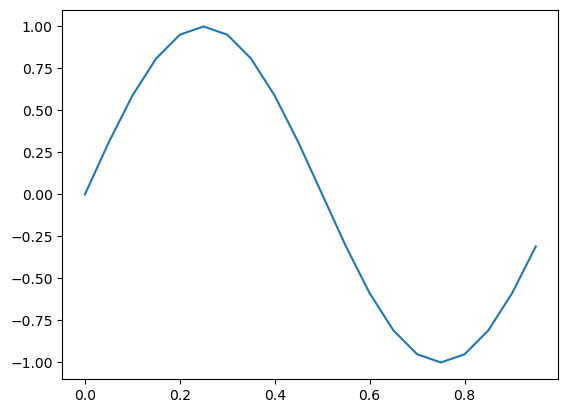

In [64]:
#set up physical system 
wavelength =1
f=1
speed = wavelength*f
wavevector =2*np.pi/wavelength
ang_freq = 2*np.pi*f

# Define number of points and factor r
N = 20
mult =  5 # Number of wavelengths
r = 0.3*np.ones(mult*N)
# Start and end points for change of r
st = 0.15
en = 0.3
# setting r value at each region 
r = 0.3*np.ones(mult*N)
r[2*N:3*N]=0.15 

# Initialise
dx = wavelength/N 
dt = r*dx/speed
x = np.arange(0,5,dx)


# Initial restricted sine wave
theta = np.sin(wavevector*x[0:N])
plt.plot(x[0:N],theta)


### 3. Run the solver, storing the results, and plot

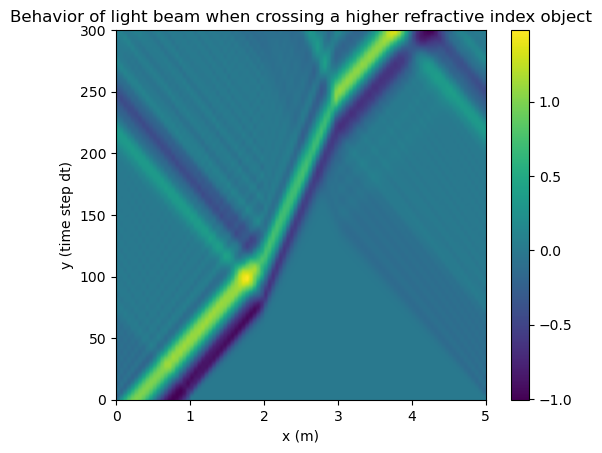

In [26]:
# Initial boundary condition
t = 0
theta_0 = np.sin(wavevector*x - ang_freq*t)
t += dt
theta_1 = np.sin(wavevector*x - ang_freq*t)

# Restricting initial wave to one wavelength
theta_0[N:] = 0.0
theta_1[N:] = 0.0

# Run for at least 300 steps
iters = 300
#Creating a variable to store the value of theta at every time step 
store_theta=np.zeros((iters+2,len(x)))

store_theta[0]=theta_0
store_theta[1]=theta_1

#Propagating the boundary condition
for i in range(2,iters+2):
    store_theta[i]= explicit_wave_eq_update(store_theta[i-1],store_theta[i-2],r)

    
# Plotting the path of light
plt.imshow(store_theta,extent=(0,5,0,300),aspect=(5/300),origin='lower')
plt.title('Behavior of light beam when crossing a higher refractive index object')
plt.xlabel('x (m)')
plt.ylabel('y (time step dt)')
plt.colorbar()

### Physical explanation of what have been shown on the graph
See can see that most of the light bend when crossing the hgiher refraction index object when a small minority of light get reflect on the boundary surface of the object causing some of the light to travel in the back direction despite passing through the object.

#### 3.1 3D plot

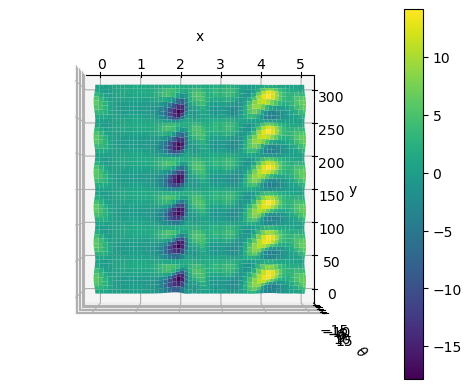

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

# Changing refractive index 
r = 0.3*np.ones(mult*N)
r[2*N:3*N]=0.15 
dt = r*dx/speed

x = np.arange(0,5,dx) 
    

iters = 300
t=np.linspace(0,iters)
x_2D,t_2D = np.meshgrid(x,t)


#propagating wave 
theta_0 = np.sin(wavevector*x_2D)
theta_1 = np.sin(wavevector*x_2D - ang_freq*t_2D)

# Restrict initial wave to one wavelength
theta_1[:,N:-1] = 0.0
theta_1[0]=0

theta_0[0,:]=0
theta_0[:,N:-1] = 0

#Propagating the initial wave
for i in range(iters):
    theta_2D_next= explicit_wave_eq_update(theta_1,theta_0,r)
    theta_0=theta_1
    theta_1=theta_2D_next



ax3d1 = fig.add_subplot(111,projection='3d')
surf = ax3d1.plot_surface(x_2D, t_2D,  theta_2D_next ,cmap='viridis')
ax3d1.set_xlabel('x')
ax3d1.set_ylabel('y')
ax3d1.set_zlabel(r'$\theta$')
# Notice how we can add a colorbar using the surface (what we want to colour) and 
# the axis (what we attach the colorbar to)
fig.colorbar(surf,ax=ax3d1)
ax3d1.view_init(90,270) 





### No Comment - I literally have no idea what is going on... Cannot reproduce the same physical phenomenon graphed earlier part (the 2D plot) 

Is it because I haven't specify the correct boundary condition or propagating it wrong? The parameter for surface plot is x,y,z I know how to find the parameter x and y. For z it has to be a function of x and y, but at the sametime we are propagating it so I dont know how to adapt the propagater solver for z.

#### 3.2 2D subplots

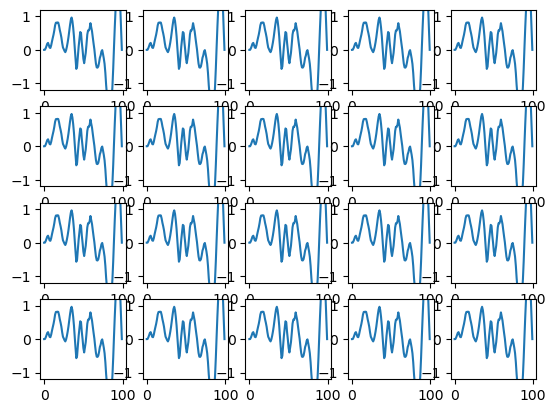

In [71]:
fig_parts=plt.figure()
rows=4
cols=5
num=rows*cols
step=int(iters/num)
graph=1

for i in range(num):
    ax=fig_parts.add_subplot(rows,cols,i+1)
    
    # I dont really know whether I am doing anything correct
    if i % step ==0:
        r = 0.3*np.ones(mult*N)
        r[2*N:3*N]=0.15 
        dt = r*dx/speed
        x = np.arange(0,5,dx) 
        
        theta_0=np.sin(wavevector*x)
        theta_1=np.sin(wavevector*x - dt*ang_freq)
        
        for i in range(iters):
            theta_next= explicit_wave_eq_update(theta_1,theta_0,r)
            theta_next[0] = 0.0
            theta_next[-1] = 0.0
            # Update
            theta_0 = theta_1
            theta_1 = theta_next
    ax.plot(theta_next)
    ax.set_ylim((-1.2,1.2))
    


### No Idea How to do this 
...

### 4. Varying refractive index
Investigate the light path through a medium with changing refractive index

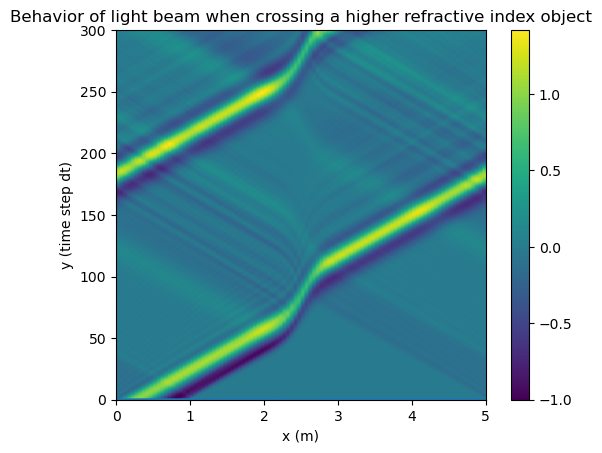

In [72]:
#set up physical system 
wavelength =1
f=1
speed = wavelength*f
wavevector =2*np.pi/wavelength
ang_freq = 2*np.pi*f

# Define number of points and factor r
N = 20
mult =  5 # Number of wavelengths

# setting r value at each region 
rv = 0.3*np.ones(mult*N)
rv[2*N:3*N]=0.1*(np.cos(2*np.pi*(x[2*N:3*N]-2*wavelength)/wavelength)+2) 

# Initialise
dx = wavelength/N 
dt = rv*dx/speed
x = np.arange(0,mult*wavelength,dx)

t = 0
theta_0v = np.sin(wavevector*x - ang_freq*t)
t += dt
theta_1v = np.sin(wavevector*x - ang_freq*t)

# Restrict initial wave to one wavelength
theta_0v[N:] = 0.0
theta_1v[N:] = 0.0


plt.plot(x,rv)
# Run for 600 steps

iters = 600
store_theta_rv=np.zeros((iters+2,len(x)))

store_theta_rv[0]=theta_0v
store_theta_rv[1]=theta_1v
for i in range(2,iters+2):
    store_theta_rv[i]= explicit_wave_eq_update(store_theta_rv[i-1],store_theta_rv[i-2],rv)

plt.imshow(store_theta_rv,extent=(0,5,0,300),aspect=(5/300),origin='lower')
plt.title('Behavior of light beam when crossing a higher refractive index object')
plt.xlabel('x (m)')
plt.ylabel('y (time step dt)')
plt.colorbar()

# Physical description
The beam of light is deflected away from the normal of the surface of the boundary as expected. Now that the refractive index is changing within the medium, the light is no longer straight within the medium instead having a bit of gradient change.

## Conclusion
By propagating an initial wave through a medium, I was able to resemble the expected physical phenomenon but I still do not know how to plot the 3D graph and subplots showing snapshots of the wave over time.
